# This notebook identifies days on which Traffic deviates significantly from its median weekly behavior.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

W = np.loadtxt('W_trips.txt')

In [2]:
# Calculate median weekly traffic trends for each signature
W_day_week = [[] for dayofweek in range(7)]
W_day_hour_week = [[] for dayofweek in range(7)]
W_day_hour_median = [[] for dayofweek in range(7)]

for hourofyear in range(8760):
    dayofyear = hourofyear//24
    dayofweek = dayofyear%7
    W_day_week[dayofweek].append(W[hourofyear]) 

W_day_week = np.array(W_day_week)
assert len(W_day_week) == 7


for dayofweek in range(7):
    
    W_day_hour_week[dayofweek] = [[] for hourofday in range(24)]
    
    for i in range(len(W_day_week[dayofweek])):
        hourofday = i%24
        W_day_hour_week[dayofweek][hourofday].append( W_day_week[dayofweek][i] )
    
    W_day_hour_week[dayofweek] = np.array(W_day_hour_week[dayofweek])
    W_day_hour_median[dayofweek] = np.median(W_day_hour_week[dayofweek], axis=1)

W_day_hour_median = np.array(W_day_hour_median)

In [3]:
# Calculate deviation from median trend for each day of the year and store in numpy array X.
dev = [0 for hourofyear in range(8760)]
X   = [0 for dayofyear in range(365)]

for hourofyear in range(8760):
    dayofyear = hourofyear//365
    dayofweek = dayofyear%7
    hourofday = hourofyear%24
    dev[hourofyear] = abs(W[hourofyear] - W_day_hour_median[dayofweek][hourofday])
dev = np.array(dev)

for dayofyear in range(365):
    timeslot = range(dayofyear*24, dayofyear*24 + 24)
    X[dayofyear] = sum([dev[t] for t in timeslot]) #/ sum([W_day_hour_median[(t//365)%7][t%24] for t in timeslot])
X = np.array(X)
print(X.shape)
np.savetxt('X_trips.txt', X)

(365, 50)


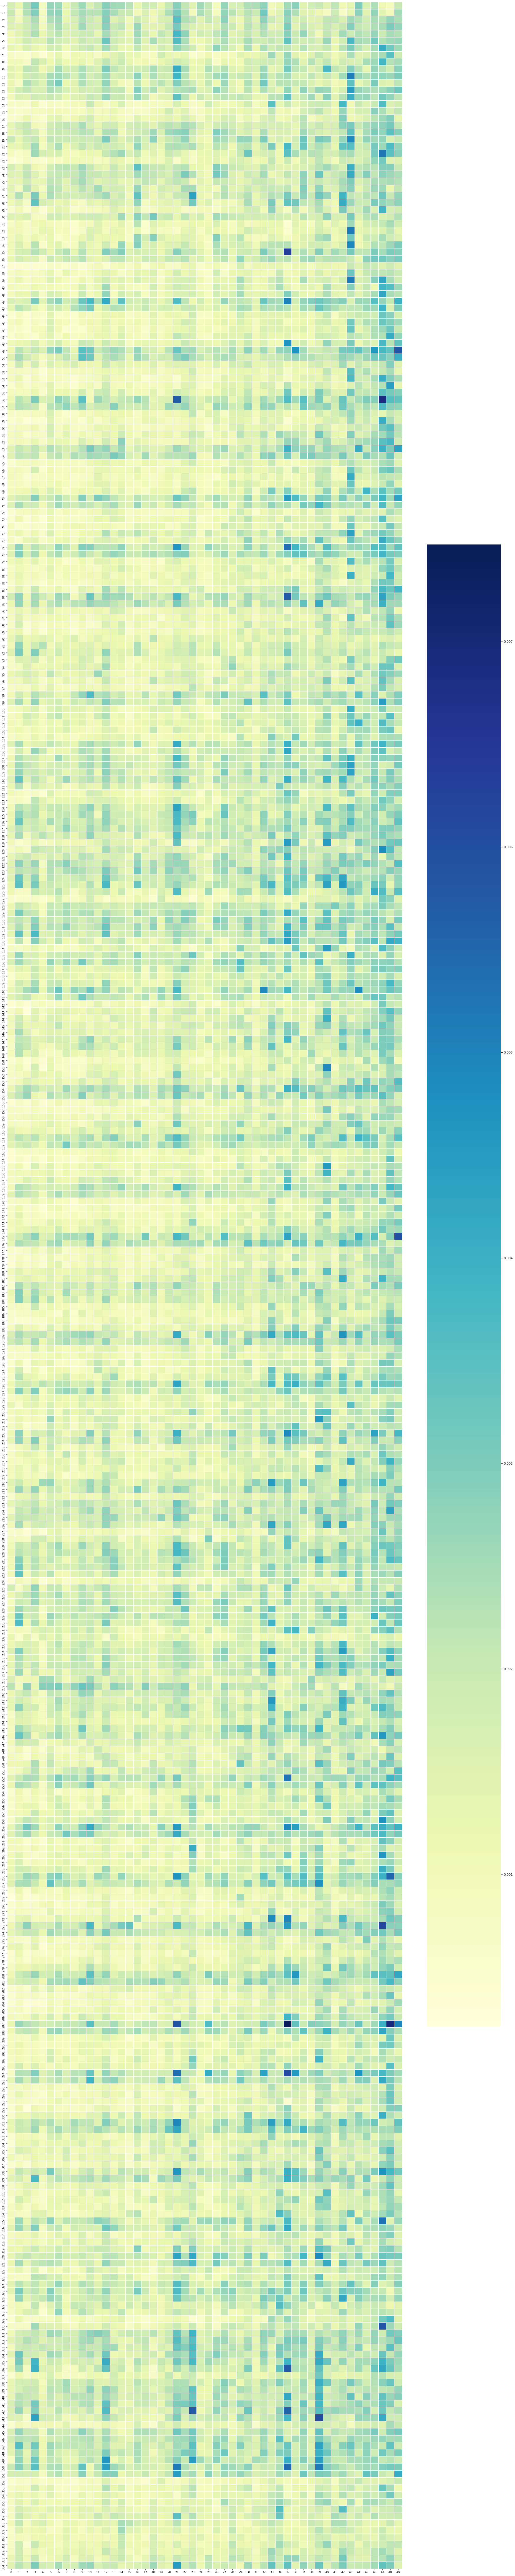

In [4]:
X = np.loadtxt('X_trips.txt')
fig, ax = plt.subplots()
sns.set()
fig.set_size_inches(30, 160)
ax = sns.heatmap(X, linewidths=0.2, cmap="YlGnBu")

In [5]:
W_day_hour_median.shape

(7, 24, 50)

In [6]:
# Sort days in decreasing order of (total deviation for all 50 signatures)
sorted(enumerate(np.sum(X, axis=1)), key=lambda day: day[1], reverse=True)

[(287, 0.1291912415278247),
 (294, 0.12578977012372997),
 (49, 0.12536644953684623),
 (259, 0.12454079832222067),
 (350, 0.12383609878135275),
 (56, 0.121436191004651),
 (42, 0.12140815168448166),
 (77, 0.12119543538480869),
 (175, 0.12092096192626803),
 (140, 0.12026483944854853),
 (189, 0.11875354982530989),
 (154, 0.11821381685526644),
 (78, 0.11756161349262649),
 (70, 0.1175382143834673),
 (301, 0.11749354942349818),
 (84, 0.1174725486726786),
 (273, 0.11648874328901218),
 (196, 0.11646174596939829),
 (302, 0.11642910652899707),
 (260, 0.11613465595696136),
 (266, 0.11612010262439992),
 (280, 0.11589701431497722),
 (252, 0.11567220842589464),
 (176, 0.11534602650620712),
 (161, 0.1151511976012782),
 (281, 0.11485936097481889),
 (288, 0.11467531290030746),
 (267, 0.11447627071255313),
 (131, 0.11381980598479419),
 (63, 0.11362713483896608),
 (125, 0.11358117663260368),
 (130, 0.11284094180368535),
 (347, 0.11283102776701262),
 (320, 0.11246443966925042),
 (123, 0.11203599035224991),

In [7]:
# Sort days in decreasing order of (maximum deviation among all 50 signatures)
sorted(enumerate(X.max(axis=1)), key=lambda day:day[1], reverse=True)

[(287, 0.007471905571667305),
 (56, 0.006849080917381),
 (35, 0.006328067509104499),
 (273, 0.006195831379634089),
 (294, 0.006078905886380742),
 (343, 0.006077668700944355),
 (175, 0.005999459779617908),
 (49, 0.005822641750112503),
 (330, 0.005813632557977663),
 (84, 0.0057445486591186715),
 (336, 0.005736764955227756),
 (342, 0.005735158736607249),
 (266, 0.005517796234462626),
 (350, 0.0054473273082782355),
 (77, 0.00541201152247503),
 (315, 0.005289794786938674),
 (252, 0.005268652495811575),
 (21, 0.005220276235166037),
 (39, 0.005163233795594609),
 (32, 0.005161118918849436),
 (10, 0.0051000107110874245),
 (42, 0.00502700225960215),
 (272, 0.004987338902884216),
 (301, 0.004946172751179827),
 (259, 0.004933518226372167),
 (34, 0.004909493282107823),
 (140, 0.004907044901429375),
 (151, 0.00488293762242962),
 (19, 0.004881153757291887),
 (320, 0.004880082693302251),
 (203, 0.0048548438909272115),
 (120, 0.004832560192064166),
 (308, 0.004736715195539244),
 (258, 0.004728514975528

In [12]:
def make_plot(sig, date, dname, fname=lambda sig, date: f'./Images/Extreme_Events/Day_{date}/sig{sig}'):
    # Setting up the figure
    sns.set_style("white")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    plt.figure(figsize = (10,8), dpi=200)

    # Setting up the data
    days_of_week = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thurday', 'Friday']
    dow = days_of_week[date%7]
    w = W[:,sig]
    w2 = w.reshape(len(w)//24, 24)[date%7::7]

    # Drawing all trends
    plt.plot(w[date%7*24 : 24 + date%7*24], linewidth = 2, label = f'other {dow}s', color='silver')
    [plt.plot(w[day*24 : 24 + day*24], linewidth = 2, color='silver') for day in range(date%7, 365, 7)]
    
    # Drawing median trends
    plt.plot(np.median(w2, axis=0), linewidth=4, color='r', label = f'median {dow}')
    
    # Drawing selected trends
    plt.plot(w[date*24 : 24 + date*24], label = f'{dow}, {dname}', linewidth=4, color='k')
    
    # Finishing touches.
    plt.xlabel('Time of day')
    plt.ylabel('Relative taxi count')
    plt.title(f'Signature {sig} on {dow}s')
    plt.legend()
    plt.tight_layout()
    sns.despine()
    plt.savefig(fname(sig, date))
    plt.close()  # plt.show()
    print(f'sig = {sig}, date = {date}')

In [13]:
# Manually track extreme events and make relevant plots and graphs
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
days_of_week = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thurday', 'Friday']

extreme_date = {
    238: 'Aug27', # August 27, Hurrnicane Irene day 3
    239: 'Aug28', # August 28, Hurrnicane Irene day 4
    240: 'Aug29', # August 29, Hurrnicane Irene day 5
     30: 'Jan31', # January 31, North American Blizzard day 0
     31: 'Feb01', # February 1, North American Blizzard day 1
     32: 'Feb02', # February 2, North American Blizzard day 2
    287: 'Oct15', # October 15, Occupy WallStreet
    259: 'Sep17', # September 17, Occupy WallStreet + UFO sighting
     56: 'Feb26', # February 26, Wisconsin Labor Rally
    357: 'Dec24', # December 24, Boxing Day
    358: 'Dec25', # December 25, Christmas
}

for sig in range(50):
    make_plot(sig, 358, extreme_date[358])

sig = 0, date = 358
sig = 1, date = 358
sig = 2, date = 358
sig = 3, date = 358
sig = 4, date = 358
sig = 5, date = 358
sig = 6, date = 358
sig = 7, date = 358
sig = 8, date = 358
sig = 9, date = 358
sig = 10, date = 358
sig = 11, date = 358
sig = 12, date = 358
sig = 13, date = 358
sig = 14, date = 358
sig = 15, date = 358
sig = 16, date = 358
sig = 17, date = 358
sig = 18, date = 358
sig = 19, date = 358
sig = 20, date = 358
sig = 21, date = 358
sig = 22, date = 358
sig = 23, date = 358
sig = 24, date = 358
sig = 25, date = 358
sig = 26, date = 358
sig = 27, date = 358
sig = 28, date = 358
sig = 29, date = 358
sig = 30, date = 358
sig = 31, date = 358
sig = 32, date = 358
sig = 33, date = 358
sig = 34, date = 358
sig = 35, date = 358
sig = 36, date = 358
sig = 37, date = 358
sig = 38, date = 358
sig = 39, date = 358
sig = 40, date = 358
sig = 41, date = 358
sig = 42, date = 358
sig = 43, date = 358
sig = 44, date = 358
sig = 45, date = 358
sig = 46, date = 358
sig = 47, date = 358
si

## Plot particular Signature on a particular day accross all dates

In [14]:
for date in range(0, 365, 7):
    make_plot(0, date, 'Day' + str(date), fname=lambda sig, date : f'./Images/Extreme_Events/Sig_{sig}/{date}')

sig = 0, date = 0
sig = 0, date = 7
sig = 0, date = 14
sig = 0, date = 21
sig = 0, date = 28
sig = 0, date = 35
sig = 0, date = 42
sig = 0, date = 49
sig = 0, date = 56
sig = 0, date = 63
sig = 0, date = 70
sig = 0, date = 77
sig = 0, date = 84
sig = 0, date = 91
sig = 0, date = 98
sig = 0, date = 105
sig = 0, date = 112
sig = 0, date = 119
sig = 0, date = 126
sig = 0, date = 133
sig = 0, date = 140
sig = 0, date = 147
sig = 0, date = 154
sig = 0, date = 161
sig = 0, date = 168
sig = 0, date = 175
sig = 0, date = 182
sig = 0, date = 189
sig = 0, date = 196
sig = 0, date = 203
sig = 0, date = 210
sig = 0, date = 217
sig = 0, date = 224
sig = 0, date = 231
sig = 0, date = 238
sig = 0, date = 245
sig = 0, date = 252
sig = 0, date = 259
sig = 0, date = 266
sig = 0, date = 273
sig = 0, date = 280
sig = 0, date = 287
sig = 0, date = 294
sig = 0, date = 301
sig = 0, date = 308
sig = 0, date = 315
sig = 0, date = 322
sig = 0, date = 329
sig = 0, date = 336
sig = 0, date = 343
sig = 0, date = 3

## Extreme events included in the manuscript

1. Signature 0 during Christmas day.
   The other "low" day is Hurricane Irene day 4 (not shown) i.e. Day 239
   
2. Signature 4 during Christmas day.
   The other "low" day is Hurricane Irene day 4 (not shown) i.e. Day 239

3. Signature 21 during Wisconsin Labor Rally.
   The other "low" days are
   - Day 91 : April 2nd : International pillowfight day @ Union Square.  Involving police blockades.
   - Day 119 : April 30th : Cause unknown

4. Signature 0 during Hurricane Irene day 3.
   The other "low" day is Day 189 : July 9th : Baseball game, Yankees vs. tampa Bay Rays in Bronx.
   More than 48k attended.

## The following images were made specifically for  the manuscript
By modifying `make_plots`

In [15]:
def make_multiple_plots(sig, list_of_dates, list_of_dnames):
    # Setting up the figure
    sns.set_style("white")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    plt.figure(figsize = (10, 8), dpi=200)
    fname = f'./Images/Extreme_Events/sig{sig}_{str(list_of_dnames)}'
    patterns = ['dotted', 'dashed', 'solid']
    
    # Setting up the data
    date0 = list_of_dates[0]
    days_of_week = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thurday', 'Friday']
    dow = days_of_week[date0%7]
    w = W[:,sig]
    w2 = w.reshape(len(w)//24, 24)[date0%7::7]

    # Drawing all trends
    plt.plot(w[date0%7*24 : 24 + date0%7*24], linewidth = 2, label = f'other {dow}s', color='silver')
    [plt.plot(w[day*24 : 24 + day*24], linewidth = 2, color='silver') for day in range(date0%7, 365, 7)]

    # Drawing median trends
    plt.plot(np.median(w2, axis=0), linewidth=4, color='r', label = f'median {dow}')

    for index, date_dname in enumerate(zip(list_of_dates, list_of_dnames)):
        date, dname = date_dname
        # Drawing selected trends
        plt.plot(w[date*24 : 24 + date*24], label = f'{dow}, {dname}', linewidth=4, color='k',
                 linestyle=patterns[index])


    # Finishing touches.
    plt.xlabel('Time of day')
    plt.ylabel('Relative taxi count')
    plt.title(f'Signature {sig} on {dow}s')
    plt.legend()
    plt.tight_layout()
    sns.despine()
    plt.savefig(fname)
    plt.close()  # plt.show()
    print(f'sig = {sig}, date = {date}')

In [16]:
make_multiple_plots(0,  [239, 358], ['Aug28', 'Dec25'])
make_multiple_plots(4,  [239, 358], ['Aug28', 'Dec25'])
make_multiple_plots(21, [56, 91, 119], ['Feb26', 'Apr02', 'Apr30'])
make_multiple_plots(0,  [189, 238], ['Jul09', 'Aug27'])

sig = 0, date = 358
sig = 4, date = 358
sig = 21, date = 119
sig = 0, date = 238
